# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# # Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "bien", "peut", "tous", "autant", "elles","ministre", "reçu",
       "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non", "prochain","veut",
       "faut", "trois", "aussi", "dit", "doit", "contre", "depuis","quand", "tant", "donner", "ici", "article", "également", "moment", "but", "MME",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "leurs", "très", "fois", "beaucoup", "surtout", "enfin", "heure", "maintenant", "présent",
       "alors", "près", "ans", "car", "ai", "aie", "aient", "aies", "ait","rien", "seulement", "voici","reste", "ensuite", "importance", "corps", "mètres",
       "as", "au", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "actuellement", "font", "titres","points",
       "aurons", "auront", "autre", "autres", "aux", "avaient", "avais", "avait", "avant", "avec", "avez", "jamais", "trop", "quant",
       "aviez", "avions", "avoir", "avons", "ayant", "ayante", "ayantes", "ayants", "ayez", "ayons", "aucune","Elles","puis", "semble", "matin",
       "c", "ce", "ces", "cet", "ceux", "chaque", "compte", "d", "dans", "de", "des","du", "déjà", "elle", "en", "es", "est", "suivant", "juillet",
       "et", "etc", "eu", "eue", "eues", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "grands", "dix",
       "eûmes", "eût", "eûtes", "faits","furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "déclaré",
       "fûtes", "générale", "heures", "il", "ils", "j", "je", "jour", "jours", "jusqu", "l", "la", "le", "les", "leur", "leurs", "liste", 
       "lui", "m", "ma", "mais", "me", "mes", "mis", "moi", "mois", "mon", "même", "n", "ne", "nombre", "nos", "dernier", "façon","janvier",
       "notre", "nous", "on", "ont", "ou", "page", "par", "parce", "pas", "point", "pour", "premier","plusieurs", "celles", "semaine","février",
       "pris", "qu", "que", "quelques", "qui", "rue", "réponse", "s", "sa", "sans", "se", "sera", "serai", "seraient", "vue", "voir","ligne","mars",
       "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "environ", "chez","année", "avril",
       "soient", "sois", "soit", "sommes", "son", "sont", "sous", "soyez", "soyons", "suis", "suite", "sur", "t", "ta", "nuit", "peuvent", "mai", "tel que",
       "te", "tes", "toi", "ton", "toute", "tu", "un", "une", "van", "vie", "vos", "votre", "possible", "malgré", "dès", "moyens", "juin", "gros", "telle que",
       "vous", "y", "à", "étaient", "étais", "était", "étant", "étante", "étantes", "étants", "étiez", "étions", "devant", "dernier", "août","grosse",
       "été", "étée", "étées", "étés", "êtes", "pondu", "aucun", "celui", "doivent", "mieux", "parmi", "mal", "cent", "septembre","octobre", "novembre",
       "bonne", "bon", "certaines", "certains", "mettre", "sujet", "nouvelle", "nouveau", "sait", "vient", "peu", "concerne", "décembre","décidé", "recçu",
       "cas", "vers", "millions", "milliards", "Elles", "doute", "notamment", "fort", "grande", "dernière", "divers", "effet", "soir", "demande", "tel", "telle", 
       "mesure", "général", "grandes", "chiffres", "cependant", "hier", "question", "quelque", "laquelle", "séance", "trouve", "prendre","appel", "petit",
       "assez", "mêmes", "chambre", "nom", "cinq", "nouveaux", "ailleurs", "MME", "atteint", "tonnes", "occasion", "donnée", "net", "petite", "grand", "grande",
       "quatre", "toujours", "chef", "aujourd'hui", "actuelle", "abord", "grand", "quand", "certain", "aujourd", "petit", "exercice", "pourrait", "déclare", 
       "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "donnée", "donné", "tête", "demain", "hier", "new", "nombreux", "années"]
sw = set(sw)

## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1945

In [4]:
# Lister les Fichiers
data_path = "../data/camille_crise_economique_depression_economique_année 30/"
files = os.listdir(data_path)

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for myFile in files:
    with open(data_path+myFile, 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

3700

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'fftn Ve ndredi \\- j mars 1929 Ejfttua J,s louruaus da l\'A I llitl 11: P^, a e-*aa-Herjea-Poti^or4W. Bruxelle. *j. ...ini-lliwi . ... «X3.NV IJaiu 0 *\' •» ,,,,t **. Abunn" . «V3.WI 30 centimes le numér'

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'crise.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'crise.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'fftn Ve ndredi \\- j mars 1929 Ejfttua J,s louruaus da l\'A I llitl 11: P^, a e-*aa-Herjea-Poti^or4W. Bruxelle. *j. ...ini-lliwi . ... «X3.NV IJaiu 0 *\' •» ,,,,t **. Abunn" . «V3.WI 30 centimes le numéro jLS-clitJiori. * 40™ année N°60 {^Ajt.plUQB. 1*11 br» BmieU.l. tejoaWKMKnrTje. IOVJ Luiea. 68.00 « muis.83.00;3 mois. 19.00 "l Ua an. I 10 "■•; 6 m. 60 fr.; S ai. 30 (r. 0; a\'uieaiu conventions postales. tiTlSh. Edit»». 22 h. Edit • lh.m. r^? VOiatt aaus m * i Patriote Illustré DE CETTE SEMAINE La'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(folder=None):
    if folder is None:
        input_path = "crise.txt"
        output_path = "crise_clean.txt"
    else:
        input_path = f"{folder}/crise.txt"
        output_path = f"{folder}/crise_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/crise_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, 'crise_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'FFTN NDREDI EJFTTUA LOURUAUS LLITL HERJEA POTI BRUXELLE INI LLIWI IJAIU ABUNN CENTIMES NUMÉRO JLS CLITJIORI AJT PLUQB BMIEU TEJOAWKMKNRTJE IOVJ LUIEA MUIS UIEAIU CONVENTIONS POSTALES TITLSH EDIT EDIT VOIATT AAUS PATRIOTE ILLUSTRÉ VAGUE FROID DENS TRTIKIER CENTENAIRE JEANNE ARC ACCIDENT AVIATION CONGO LÉLÉCLNÉRMA TRANSMISSION LMAF ANIMETS PARTOUT NUMÉRO CORRESPONDANT PARTCULICR LONDRES AFFIRMANT CITÉ EIEUX EXASPÉRER DÉMAGOGUES SIMPLEMENT EXCUSER CTIOUS PROPRE CITÉ RÊVÉ MONDE PRATI TINE PHILOSOPHI'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('GOUVERNEMENT', 35364), ('PAYS', 26316), ('BRUXELLES', 26211), ('PRÉSIDENT', 23776), ('PRIX', 23137), ('BELGIQUE', 22791), ('COURS', 19046), ('POLITIQUE', 18988), ('CONSEIL', 18630), ('PARIS', 18582)]


### Créer, stocker et afficher le nuage de mots

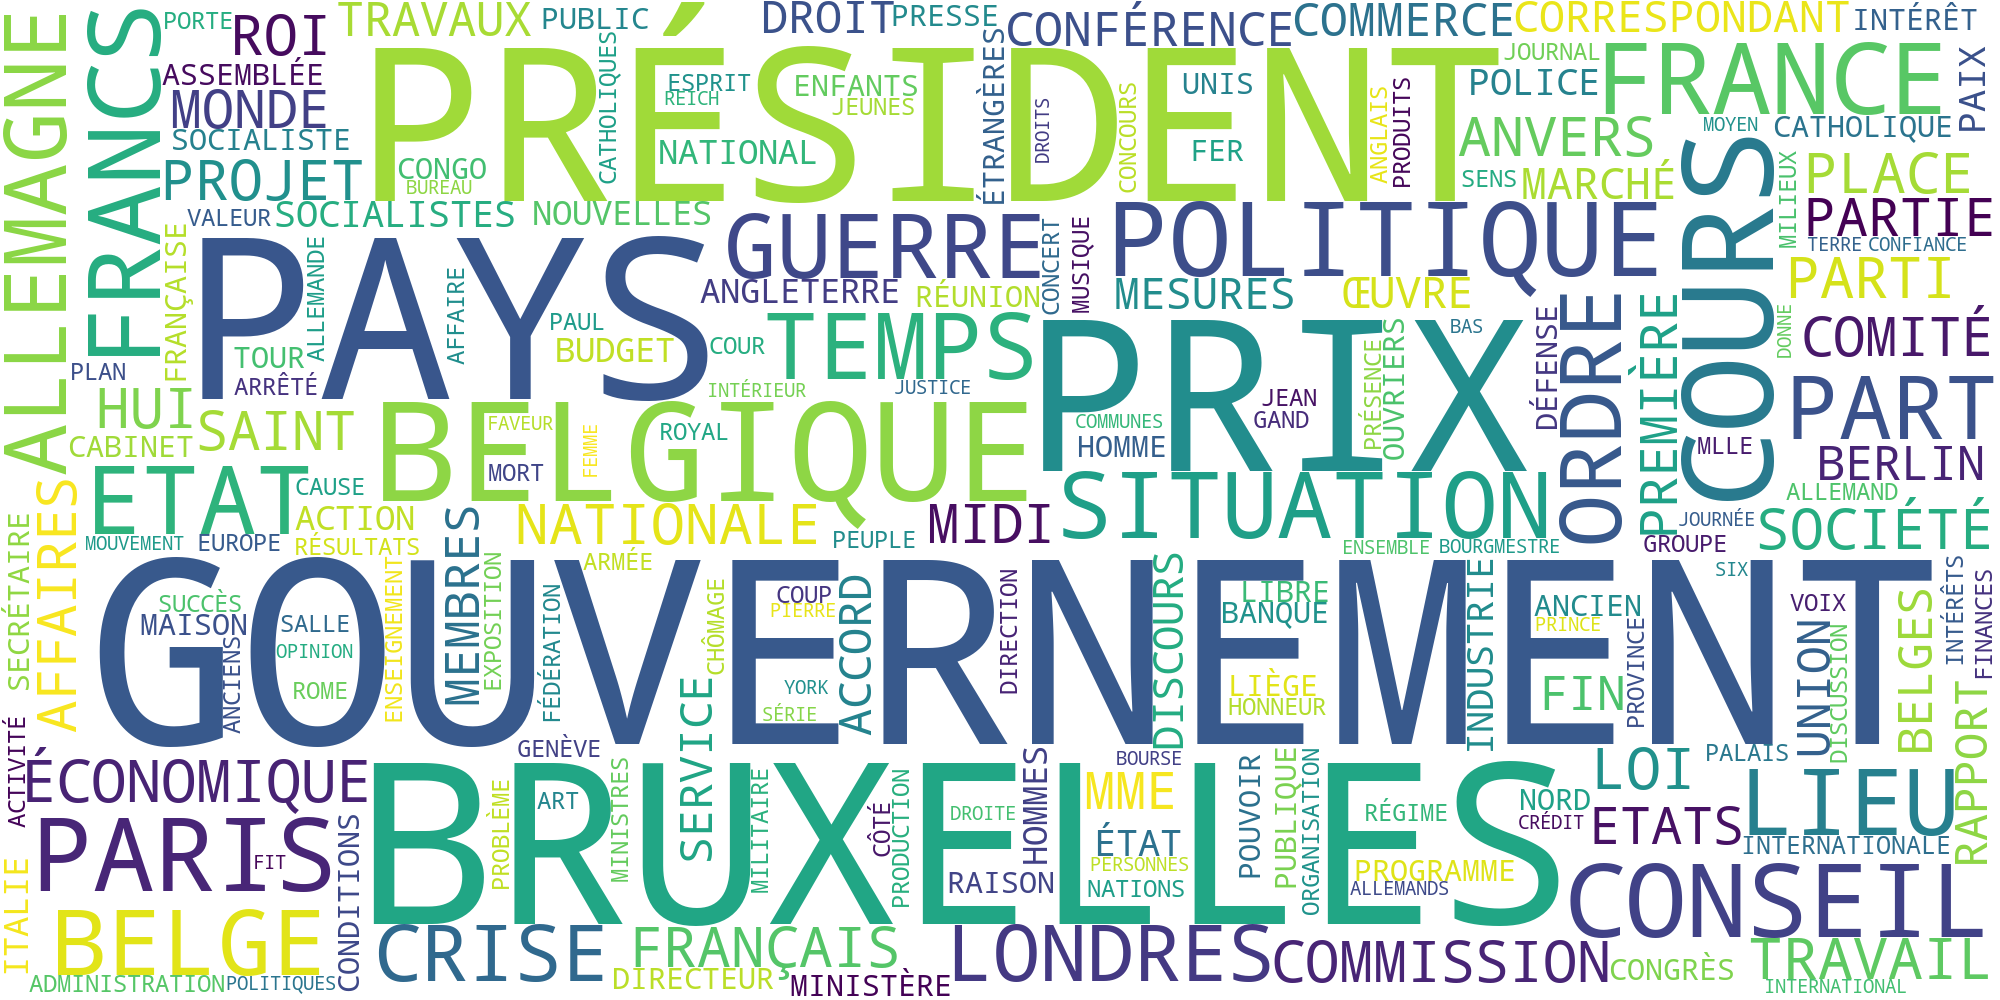

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, "crise.png"))
Image(filename=os.path.join(temp_path, "crise.png"))